# Segmentación por regiones. Clustering

Una vez vista la práctica de umbralización, vamos a pasar a la segmentación por regiones. En esta práctica vamos a centrarnos en la utilización del algoritmo kmeans para segmentar imágenes y extraer información relevante de la misma.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### Ejercicio 1

En este ejercicio vamos a aplicar el algoritmo Kmeans para segmentar imágenes en escala de grises. Para ello, lee la imagen 01.bmp y vamos a trabajar sobre ella. Mediante la instruccion alg = Kmeans(n_clusters = 2, n_init = 10) vamos a instanciar la clase Kmeans especificando 2 clusters y 10 ejecuciones para encontrar la mejor segmentación.

Para ejectutar el algoritmo kmeans debemos llamar al procedimiento fit de la clase KMeans, pasando como parámetro de entrada una matriz con tantas filas como ejemplos a clasificar y tantas columnas como dimensiones tenga cada ejemplo. En nuestro caso, puesto que solo estamos clasificando utilizando la intensidad, debemos tener tantas filas como píxeles tenga la imagen y una única columna, la correspondiente a la intensidad.

Una vez el algoritmo kmeans haya sido ejecutado, podemos acceder a los siguientes atributos:
- cluster_centers_ : matriz que contiene los centros de cada clase. En este caso será una matriz de K filas y tantas columnas como dimensiones (en nuestro caso 1)
- labels_: matriz que contiene la etiqueta asignada a cada ejemplo clasificado (entre 0 y K-1). Esta matriz tendrá las mismas filas que la matriz con la que hemos llamado a fit

Una vez ejecutado el algoritmo kmeans visualiza la imagen segmentada (en blanco y negro) y muestra por pantalla los centroides. 

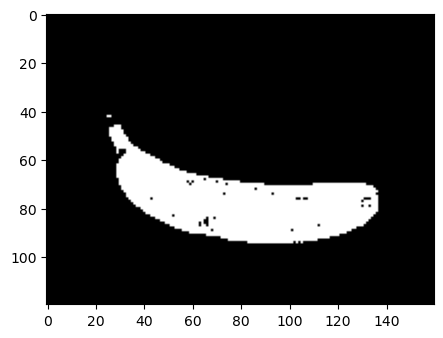

In [25]:
imagen = cv2.imread('images/01.bmp', 0)
alg = KMeans(n_clusters=2, n_init = 10)

alg.fit(imagen.reshape(-1, 1))
centros = alg.cluster_centers_

segmentacion = np.uint8(255*alg.labels_.reshape(imagen.shape))

fig, axes = plt.subplots(figsize=(5,5))
axes.imshow(segmentacion, cmap = 'gray')
plt.show()
# cv2.imshow('Segmentacion KMeans', segmentacion)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Una forma interesante de visualizar las imágenes segmentadas es mediante los colores medios. Para ello crea una función llamada imagen_media que reciba como parámetros de entrada la imagen original, la imagen de etiquetas y los centros. La función devolverá una nueva imagen en la que cada píxel de la imagen tiene el valor del centro de la clase a la que se le haya asignado. Visualiza ahora la nueva imagen segmentada con las intensidades medias

In [76]:
def imagen_media(imagen, etiquetas, centros):
    imagen_plana = centros[etiquetas]
    return imagen_plana.reshape(imagen.shape)

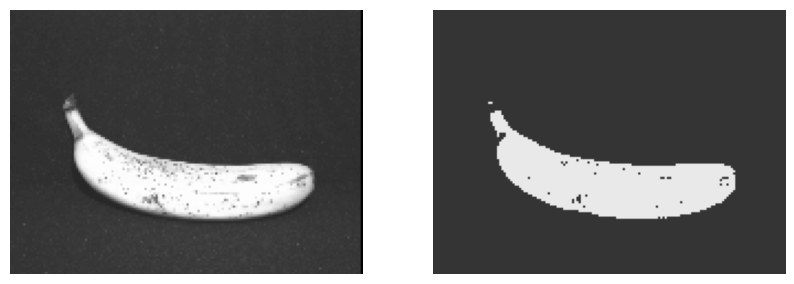

In [82]:
imagen = cv2.imread('images/01.bmp', 0)
means = KMeans(n_clusters=2, n_init=10)
means.fit(imagen.reshape(-1,1)) #usamos el algoritmo con la imagen

centros = means.cluster_centers_
etiquetas = means.labels_

imagen_out = imagen_media(imagen, etiquetas, centros)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
axes[0].axis('off')
axes[1].imshow(imagen_out.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
axes[1].axis('off')

plt.show()


### Ejercicio 2

Realiza lo mismo que el ejercicio 1 pero para la imagen en color 152.jpg. Adapta todo aquello que sea necesario, recordando que las imágenes en color tienen una dimensión de filas x columnas x 3. Puedes por ejemplo crear una nueva función imagen_media_color

Comprueba cómo queda la imagen de colores media conforme aumentamos el número de clusters. Por ejemplo, con 10 o 16 clusters. A este efecto se le denomina cuantización de color (algo parecido vimos en las primeras trasparencias de clase en el tema 2.1) y permite obtener fotos muy "artísticas", como si las hubieras pintado a mano.

Nota: si ves que tarda mucho en ejecutar con un número grande de clusters, prueba a reducir el número de ejecuciones.

In [72]:
def imagen_media_color(imagen, etiquetas, centros):

    imagen_plana = centros[etiquetas]
    return np.uint8(imagen_plana.reshape(imagen.shape))

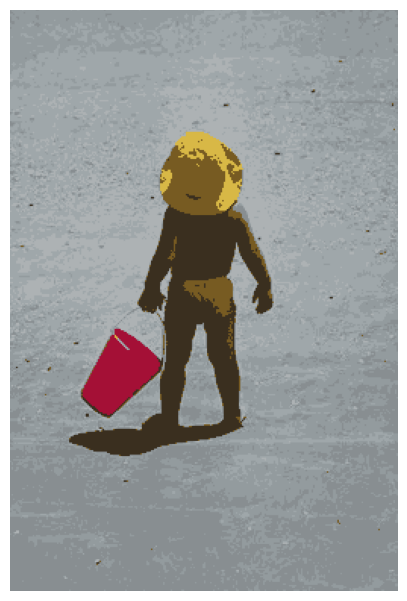

In [81]:
imagen = cv2.imread('images/152.jpg') #BGR
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

means = KMeans(n_clusters=8, n_init=20)
means.fit(imagen.reshape(-1,3))

centros = means.cluster_centers_
etiquetas = means.labels_

imagen_out = imagen_media_color(imagen, etiquetas, centros)

fig, axes = plt.subplots(figsize=(5,10))

axes.imshow(imagen_out)
axes.axis('off')
plt.show()


### Ejercicio 3

En este ejercicio vamos a utilizar el algoritmo k-means sobre imágenes en color para obtener una visualización de los colores dominantes de una imagen. Para ello crea una función llamada crear_histograma_dominante que reciba como parámetros de entrada la imagen y el número de colores que queremos obtener en el histograma dominante. La función deberá llamar al algoritmo Kmeans con el número de clusters igual al número de colores. Una vez obtenidos los centroides y las etiquetas, la función construirá un "histograma visual" con los K colores dominantes y cuya área será proporcional a la dominancia del color en la imagen. EL histograma visual será una imagen de 50x500x3, pero ¿cómo vamos a rellenar este histograma visual? Este histograma (rectángulo) estará dividido en tantas zonas como colores haya y cada zona tendrá un tamaño proporcional al número de píxeles que haya en cada zona clasificada. Finalmente, rellenaremos cada zona con el color medio (centro) de cada clase. Como una imagen vale más que mil palabras, aquí tienes algún ejemplo de cómo debería quedar el "histograma visual". En la primera imagen se muestra un histograma dominante con 3 colores y en la segunda un histograma dominante con 4 colores.

<img src="images/histogram_dominante.png">

La función que construyas deberá devolver, además del histograma, un vector con la probabiliadd de cada clase ordenada de mayor a menor y la matriz de centros de dimensión Kx3. Por ejemplo, para la imagen 645.jpg y K=3 debería devolver el histograma anterior y 

distribucion = [ 0.57219442  0.1823527   0.24545288]

centros = [[  11.69076198   15.44086423   14.13472037]
 [ 127.67410092   50.38985224  200.41912462]
 [  55.01868733   55.88344245   67.90469877]]

Para homer.jpg y K=4, debería devolver

centros = [[ 213.97724644  140.10778661   65.67790616]
 [  54.85278065  192.17956211  231.32325676]
 [ 244.94726052  247.97187685  249.29782382]
 [  17.53200372   15.22776863   16.90973728]]

distribucion = [ 0.62796631  0.16970444  0.15554886  0.0467804 ]

Nota: la función **argsort**, con un funcionamiento parecido a **argmax** o **argmin**, puede serte de utilidad en esta práctica.

In [86]:
def crear_histograma_dominante(imagen, K):
    #Creamos el histograma vacío y el vector distribucion
    histograma = np.zeros((50, 500, 3))
    distribucion = np.zeros(K)
    #LLamar al algorimto Kmeans y obtener el vector etiquetas y centros
    means = KMeans(n_clusters=K, n_init=10)
    means.fit(imagen.reshape(-1,3))
    
    etiquetas = means.labels_
    centros = means.cluster_centers_
    
    #Rellena el vector distribucion. Cada elemento de distribución contiene la probabilidad de cada una de las clases/clusters
    etiquetas_unicas, conteo = np.unique(etiquetas, return_counts=True)
        
    distribucion = conteo / len(etiquetas)    
    #Reordena distribucion y centros de mayor a menor  distribución
    indices_args = np.argsort(distribucion)

    indices_ordenados = indices_args[::-1] #ponerlos al contrario MAYOR A MENOR


    distribución = distribucion[indices_ordenados]
    centros = centros[indices_ordenados]
    
    #Rellenar el histograma 
    acumulado = distribucion.cumsum()
    histograma[:,:int(acumulado[0]*500),:] = centros[0,:]
    for i in range(1, K):
        histograma[:,int(acumulado[i-1]*500):int(acumulado[i]*500),:] = centros[i,:]
    return np.uint8(histograma), distribucion, centros

[0.15544128 0.62794724 0.16983948 0.046772  ]
[[ 65.70744974 140.09733896 213.94452058]
 [231.22591325 192.17711085  55.2834079 ]
 [249.29721067 247.98259064 245.03761148]
 [ 16.98031156  15.33139222  17.22293451]]


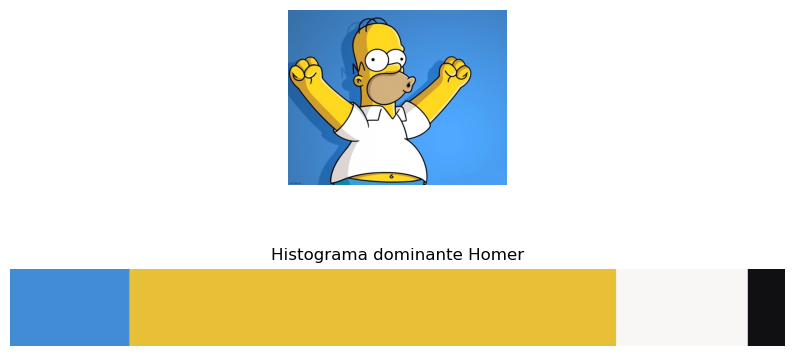

In [92]:
imagen = cv2.imread('images/homer.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
histograma, distribucion, centros = crear_histograma_dominante(imagen, 4)

print(distribucion)
print(centros)

fig, axes = plt.subplots(2,1,figsize=(10,5))

axes[0].imshow(imagen)
axes[0].axis('off')
axes[1].imshow(histograma)
axes[1].set_title('Histograma dominante Homer')
axes[1].axis('off')
plt.show()

# cv2.imshow('histograma dominante Homer', histograma)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### (Extra) Buscador de imágenes según colores dominantes

En este ejercicio vamos a utilizar los histogramas de colores dominantes para construir un pequeño buscador de imágenes por color dominante. Es decir, en lugar de hacer búsquedas por nombre, tal y como solemos hacer en internet, vamos a realizar búsquedas (en nuesta pequeña base de datos) que se parezcan a una imagen de muestra que elijamos. 

En el archivo image.orig.zip tenéis un conjunto de 1000 imágenes sin ningún tipo de etiqueta. La idea es implementar un buscador tal que, al suministrar una imagen cualquiera, el buscador sea capaz de obtener aquellas imágenes que sean más parecidas en cuanto al color dominante (asumiendo siempre un histograma dominante de 3 clases o colores). 

¿Cómo vamos a hacer esto? En primer lugar, descarga el archivo d.npy. Este diccionario contiene, para cada nombre de imagen, una matriz numpy de dimensión 3x4. La primera columna de dicha matriz representa la probabilidad de cada una de las 3 clases. El resto contiene los colores dominantes de cada una de las clases (por filas, es decir, matriz[0, 1:] contiene el color dominante de la clase 1, siendo matriz[0,0] la probabilidad de la clase 1.

Solo nos queda cómo calcular la distancia (numérica) entre un histograma de color dominante y otro. En primer lugar, se calculará la distancia de cada color dominante como la suma de las distancias al cuadrado. Así, si el color dominante de la clase 1 para la imagen A es (100,50,100) y el color dominante de la clase 1 para la imagen B es (75, 75, 105), la distancia entre ambos colores será $(100-75)^2+(50-75)^2+(100-105)^2=1275$. Para calcular la suma de distancias de los tres colores dominantes, se hará una media ponderada, donde cada peso vendrá dado por la media de las probabilidades de cada una de las clases. 

Ejemplo: 

In [ ]:
matrizA = np.array([[0.6, 100, 105, 110], [0.3, 25, 30, 200], [0.1, 0, 0, 10]])
matrizB = np.array([[0.5, 90, 100, 100], [0.25, 15, 20, 210], [0.25, 0, 0, 0]])
print (matrizA)
print (matrizB)
coloresA = matrizA[:, 1:]
coloresB = matrizB[:, 1:]
distancia_colores = np.sum((coloresA - coloresB)**2, axis=1)
distribucion_media = matrizA[:,0]*0.5 + matrizB[:,0]*0.5
distancia = np.sum(distancia_colores * distribucion_media)
print (distancia)

Vamos a definir una función buscador que reciba como parámetro de entrada la imagen de muestra y el diccionario que contiene la información de los colores dominantes de las 1000 imágenes. La función deberá devolver un listado con los X nombres de las imágenes más parecidas a la imagen de entrada (ejemplo X = 5 o X=10)

In [ ]:
def buscador(imagen, d):
    #Paso1: Crear el histograma dominante de imagen con K=3
    histograma, distribucion, centros = crear_histograma_dominante(imagen, 3)
    

    #PAso 2: Recorrer todos los índices de d 
    distancias = np.zeros(1000)
    aux = 0
    for imagen in list(d.keys()):
        #Paso 2.1: Calcular la distancia entre d[i] y el histograma dominante/distribucion de imagen
        distancias[aux] = 
        aux += 1
        
        
    #Paso 3: Obtener los X índices con menor distancia. Por ejemplo, para X = 10
    indices = np.argsort(distancias)[0:10]
    #Paso 4: Obtener la lista de nombres de arvivo
    #Recuerda que en list(d.keys())[indices[0]] contiene el nombre de la imagen más parecida, y así sucesivamente


In [ ]:
imagen_busqueda = cv2.imread('images/645.jpg')
d = np.load('images/d.npy',  encoding ='latin1', allow_pickle = True).item()
resultado = buscador(imagen, d)
for i in resultado:
    imagen = cv2.imread('images/image.orig/' + i)
    cv2.imshow(i, imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()